In [1]:
import numpy as np, pandas as pd

In [2]:
ratings = pd.read_csv("/Users/victornneji/Documents/Data Science with Python/Course_Material/S_17_Rec_Sys/ratings.csv")

In [3]:
movies = pd.read_csv("/Users/victornneji/Documents/Data Science with Python/Course_Material/S_17_Rec_Sys/movies.csv")

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [6]:
df = pd.merge(ratings, movies, on = 'movieId')

In [7]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [10]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
rating

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [12]:
rating['n_ratings'] = pd.DataFrame(data=df.groupby('title')['rating'].count())

In [13]:
rating.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [14]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [15]:
sns.set_style('white')

(array([  94.,    9.,    2.,  182.,    6.,   20.,  174.,   26.,   67.,
          16.,  419.,  148.,  140.,  503.,  204.,  329.,  965.,  350.,
         541.,  325., 1137.,  604.,  499., 1157.,  234.,  220.,  331.,
          20.,   27.,  315.]),
 array([0.5 , 0.65, 0.8 , 0.95, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.85, 2.  ,
        2.15, 2.3 , 2.45, 2.6 , 2.75, 2.9 , 3.05, 3.2 , 3.35, 3.5 , 3.65,
        3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85, 5.  ]),
 <BarContainer object of 30 artists>)

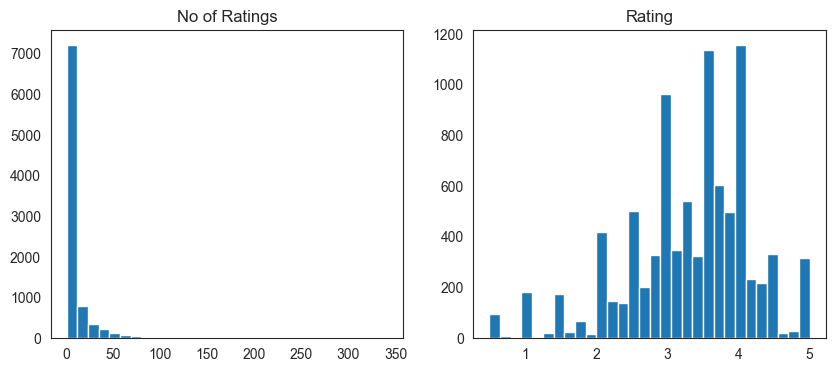

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].set_title('No of Ratings')
axes[0].hist(rating['n_ratings'], bins = 30)

axes[1].set_title('Rating')
axes[1].hist(rating['rating'], bins = 30)

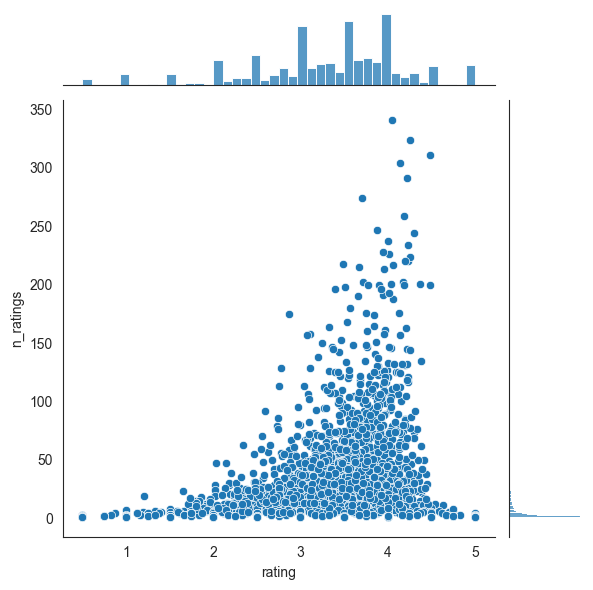

In [19]:
sns.jointplot(data = rating, x = 'rating', y = 'n_ratings')

In [20]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [21]:
rating_matrix = df.pivot_table(values = 'rating', index = 'userId', columns = 'title')

In [23]:
rating_matrix.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
rating.sort_values('n_ratings', ascending = False).head(10)

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [27]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [28]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [30]:
FG_user_ratings = rating_matrix['Forrest Gump (1994)']
Matrix_user_ratings = rating_matrix['Matrix, The (1999)']

In [32]:
FG_user_ratings.head(), Matrix_user_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64,
 userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

In [33]:
similar_to_FG = rating_matrix.corrwith(FG_user_ratings)
similar_to_Matrix = rating_matrix.corrwith(Matrix_user_ratings)

/Users/victornneji/ga_python/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/victornneji/ga_python/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [35]:
similar_to_FG.head()

title
"Great Performances" Cats (1998)           NaN
$9.99 (2008)                               1.0
'Hellboy': The Seeds of Creation (2004)    NaN
'Neath the Arizona Skies (1934)            NaN
'Round Midnight (1986)                     NaN
dtype: float64

In [36]:
corr_FG = pd.DataFrame(data = similar_to_FG, columns=['correlation'])

In [37]:
corr_FG.dropna(inplace=True)

In [38]:
corr_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [44]:
corr_Matrix = pd.DataFrame(data = similar_to_Matrix, columns=['correlation'])
corr_Matrix.dropna(inplace=True)

In [45]:
corr_Matrix.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.056624
(500) Days of Summer (2009),0.368837
*batteries not included (1987),0.743955
...And Justice for All (1979),-0.610170


In [47]:
corr_Matrix.sort_values('correlation', ascending=False).head()

,correlation
title,
Project X (2012),1.0
Southland Tales (2006),1.0
Savages (2012),1.0
Escape from Alcatraz (1979),1.0
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",1.0


(array([6.476e+03, 9.490e+02, 4.540e+02, 3.020e+02, 1.610e+02, 1.340e+02,
        1.170e+02, 9.000e+01, 6.400e+01, 3.900e+01, 4.200e+01, 3.500e+01,
        2.100e+01, 2.100e+01, 1.400e+01, 2.400e+01, 1.500e+01, 1.600e+01,
        1.600e+01, 8.000e+00, 4.000e+00, 1.000e+01, 4.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 8.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1. ,   7.8,  14.6,  21.4,  28.2,  35. ,  41.8,  48.6,  55.4,
         62.2,  69. ,  75.8,  82.6,  89.4,  96.2, 103. , 109.8, 116.6,
        123.4, 130.2, 137. , 143.8, 150.6, 157.4, 164.2, 171. , 177.8,
        184.6, 191.4, 198.2, 205. , 211.8, 218.6, 225.4, 232.2, 239. ,
        245.8, 252.6, 259.4, 266.2, 273. , 279.8, 286.6, 293.4, 300.2,
        307. , 313.8,

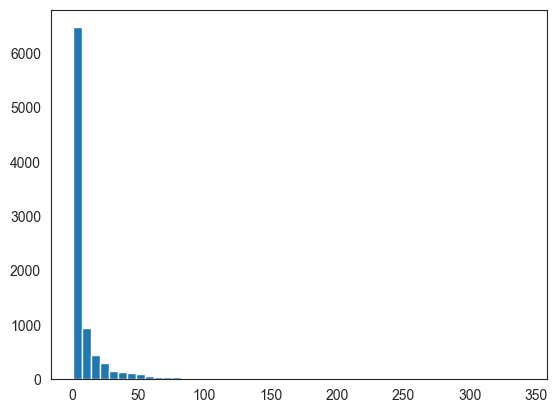

In [49]:
plt.hist(rating['n_ratings'], bins = 50)

In [50]:
corr_Matrix = corr_Matrix.join(rating['n_ratings'])

In [51]:
corr_Matrix

,correlation,n_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.056624,19
(500) Days of Summer (2009),0.368837,45
*batteries not included (1987),0.743955,7
...And Justice for All (1979),-0.610170,13
...,...,...
Zootopia (2016),0.757240,9
Zorba the Greek (Alexis Zorbas) (1964),1.000000,4
eXistenZ (1999),0.194515,24


In [54]:
corr_Matrix[corr_Matrix['n_ratings']>=50].sort_values('correlation', ascending=False)

,correlation,n_ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Prestige, The (2006)",0.458716,52
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200
...,...,...
Snow White and the Seven Dwarfs (1937),-0.283096,71
Cruel Intentions (1999),-0.303532,51
Grosse Pointe Blank (1997),-0.310048,64


In [56]:
corr_FG = corr_FG.join(rating['n_ratings'])
corr_FG[corr_FG['n_ratings']>=50].sort_values('correlation', ascending=False)

,correlation,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65
...,...,...
Seven Samurai (Shichinin no samurai) (1954),-0.245624,54
Dragonheart (1996),-0.247747,62
Star Trek (2009),-0.253816,51
